In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
advanced = pd.read_csv("nba_2020_advanced.csv")
pergame = pd.read_csv("nba_2020_per_game.csv")
shooting = pd.read_csv("nba_2020_shooting.csv")

In [4]:
pergame = pergame.assign(FPPG=lambda x: (x['PTS'] + 2*x['AST'] + 1.5*x['TRB'] + x['3P'] + -2*x['TOV'] + 3*x['STL'] + 3*x['BLK']))

In [5]:
pergame[['Player', 'PTS', 'TRB', '3P', 'TOV', 'STL', 'BLK', 'FPPG']].sort_values('FPPG', ascending=False)

,Player,PTS,TRB,3P,TOV,STL,BLK,FPPG
257,James Harden,34.3,6.6,4.4,4.5,1.8,0.9,62.70
12,Giannis Antetokounmpo,29.5,13.6,1.4,3.7,1.0,1.0,61.10
177,Luka Dončić,28.8,9.4,2.8,4.3,1.0,0.2,58.30
319,LeBron James,25.3,7.8,2.2,3.9,1.2,0.5,56.90
376,Damian Lillard,30.0,4.3,4.1,2.9,1.1,0.3,54.95
...,...,...,...,...,...,...,...,...
524,Isaiah Roby,0.0,0.7,0.0,0.3,0.0,0.0,0.45
386,J.P. Macura,0.0,0.0,0.0,0.0,0.0,0.0,0.00
198,Jacob Evans,0.0,0.0,0.0,0.0,0.0,0.0,0.00
454,Malik Newman,2.0,0.0,0.0,1.0,0.0,0.0,0.00


-----
Question 1: Who are the top 5 fantasy basketball players of the 2019-20 season?
-----

In [6]:
pergame_sorted = pergame.sort_values('FPPG', ascending=False)
print("The top 5 fantasy basketball players of 2019-20:\n", pergame_sorted[['Player', 'FPPG']][:5])

The top 5 fantasy basketball players of 2019-20:
                     Player   FPPG
257           James Harden  62.70
12   Giannis Antetokounmpo  61.10
177            Luka Dončić  58.30
319           LeBron James  56.90
376         Damian Lillard  54.95


-----
Question 2: Who are the top 5 fantasy players who come off the bench for their team?
-----

In [7]:
# FANTASY TOP 5 BENCH PLAYER OF THE YEAR
pergame_sorted = pergame_sorted.assign(START=lambda x: (x['GS']/x['G']))

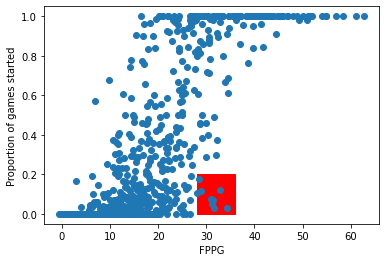

In [10]:
plt.scatter(pergame_sorted['FPPG'], pergame_sorted['START'], zorder=2)
plt.xlabel('FPPG')
plt.ylabel('Proportion of games started')
rectangle = plt.Rectangle((28,0), 8, 0.2, fc='red', ec="red")
plt.gca().add_patch(rectangle)

In [14]:
# As seen from the plot above, the highest performing fantasy bench players fall in the red rectangle, which 
# represents the 9 players that scored above 28 FPPG but started 20% or less of their games.
# Let's find them:
best_off_bench = pergame_sorted[pergame_sorted['FPPG'] > 28]
best_off_bench = best_off_bench[best_off_bench['START'] < 0.2]
best_off_bench

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FPPG,START
262,Montrezl Harrell,C,26,LAC,63,2,27.8,7.5,12.9,0.580,...,4.5,7.1,1.7,0.6,1.1,1.7,2.3,18.6,34.35,0.031746
633,Lou Williams,SG,33,LAC,65,8,28.7,6.0,14.4,0.418,...,2.6,3.1,5.6,0.7,0.2,2.8,1.2,18.2,32.85,0.123077
539,Dennis Schröder,PG,26,OKC,65,2,30.8,7.0,14.8,0.469,...,3.3,3.6,4.0,0.7,0.2,2.6,2.2,18.9,31.70,0.030769
328,James Johnson,PF,32,MIN,14,1,24.1,4.6,9.1,0.500,...,3.5,4.7,3.8,1.4,1.4,2.4,3.3,12.0,31.45,0.071429
182,Goran Dragić,PG,33,MIA,59,3,28.2,5.4,12.3,0.441,...,2.7,3.2,5.1,0.7,0.2,2.4,2.1,16.2,31.20,0.050847
52,Dāvis Bertāns,PF,27,WAS,54,4,29.3,4.9,11.3,0.434,...,3.9,4.5,1.7,0.7,0.6,1.1,2.6,15.4,30.95,0.074074
523,Mitchell Robinson,C,21,NYK,61,7,23.1,4.1,5.6,0.742,...,4.0,7.0,0.6,0.9,2.0,0.6,3.2,9.7,28.90,0.114754
449,Larry Nance Jr.,C,27,CLE,56,10,26.3,4.1,7.7,0.531,...,5.4,7.3,2.2,1.0,0.4,1.1,1.6,10.1,28.45,0.178571
338,DeAndre Jordan,C,31,BRK,56,6,22.0,3.4,5.1,0.666,...,7.5,10.0,1.9,0.3,0.9,1.3,2.0,8.3,28.10,0.107143


In [15]:
print("Top 9 fantasy basketball players coming off the bench of 2019-20:\n", 
      best_off_bench['Player'])

Top 9 fantasy basketball players coming off the bench of 2019-20:
 262     Montrezl Harrell
633         Lou Williams
539      Dennis Schröder
328        James Johnson
182         Goran Dragić
52         Dāvis Bertāns
523    Mitchell Robinson
449      Larry Nance Jr.
338       DeAndre Jordan
Name: Player, dtype: object


-----
Question 3: Who are the 5 lowest producing fantasy players that start for their team?
-----

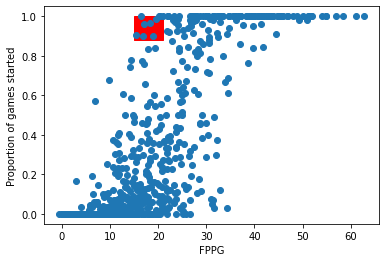

In [24]:
plt.scatter(pergame_sorted['FPPG'], pergame_sorted['START'], zorder=2)
plt.xlabel('FPPG')
plt.ylabel('Proportion of games started')
rectangle = plt.Rectangle((15,0.88), 6, 0.12, fc='red', ec="red")
plt.gca().add_patch(rectangle)

In [26]:
# As seen from the plot above, the lowest performing fantasy starting players fall in the red rectangle, which 
# represents the 10 players that scored below 17 FPPG but started 90% or more of their games.
# Let's find them:
worst_starters = pergame_sorted[pergame_sorted['FPPG'] < 21]
worst_starters = worst_starters[worst_starters['START'] > 0.88]
worst_starters

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FPPG,START
240,Danny Green,SG,32,LAL,68,68,24.8,2.9,7.0,0.416,...,2.6,3.3,1.3,1.3,0.5,0.9,2.0,8.0,20.95,1.000000
138,Zach Collins,PF,22,POR,11,11,26.4,2.9,6.2,0.471,...,4.0,6.3,1.5,0.5,0.5,1.3,3.3,7.0,20.45,1.000000
406,JaVale McGee,C,32,LAL,68,68,16.6,2.9,4.5,0.637,...,3.9,5.7,0.5,0.5,1.4,0.8,2.3,6.6,20.25,1.000000
209,Bryn Forbes,SG,26,SAS,63,62,25.1,3.8,9.2,0.417,...,1.8,2.0,1.7,0.5,0.0,0.9,1.8,11.2,19.60,0.984127
194,James Ennis,SF,29,ORL,20,18,24.5,3.0,6.7,0.451,...,3.6,4.8,1.1,0.6,0.4,1.4,2.6,8.5,19.00,0.900000
556,Tony Snell,SF,28,DET,59,57,27.8,2.9,6.5,0.445,...,1.7,1.9,2.2,0.5,0.3,0.5,1.7,8.0,18.35,0.966102
374,Meyers Leonard,C,27,MIA,51,49,20.3,2.3,4.6,0.509,...,4.5,5.1,1.1,0.3,0.3,0.8,2.1,6.1,17.15,0.960784
72,Avery Bradley,SG,29,LAL,49,44,24.2,3.5,7.8,0.444,...,2.0,2.3,1.3,0.9,0.1,1.0,2.2,8.6,16.95,0.897959
399,Wesley Matthews,SG,33,MIL,67,67,24.4,2.5,6.3,0.396,...,2.1,2.5,1.4,0.6,0.1,0.6,1.5,7.4,16.45,1.000000
226,Taj Gibson,C,34,NYK,62,56,16.5,2.7,4.6,0.584,...,2.5,4.3,0.8,0.4,0.5,0.8,2.0,6.1,15.35,0.903226


In [27]:
print("Top 10 worst fantasy starters of 2019-20:\n", worst_starters['Player'])

Top 10 worst fantasy starters of 2019-20:
 240        Danny Green
138       Zach Collins
406       JaVale McGee
209        Bryn Forbes
194        James Ennis
556         Tony Snell
374     Meyers Leonard
72       Avery Bradley
399    Wesley Matthews
226         Taj Gibson
Name: Player, dtype: object


-----
Question 4: Which 5 NBA teams are the least balanced? Who are their starters?
-----

In [28]:
team_averages = pergame_sorted.groupby('Tm', as_index=False).std().sort_values('FPPG', ascending=False)
team_averages

,Tm,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FPPG,START
10,HOU,4.482240,24.640366,24.854146,11.177416,2.911169,6.131744,0.156187,1.158509,3.139518,...,2.371417,3.195607,1.970690,0.492225,0.558228,1.193574,1.012235,8.595813,16.206680,0.425331
24,POR,5.242650,22.803252,24.550104,10.275919,2.692658,5.662398,0.071433,1.085255,2.679203,...,2.171344,2.998713,1.866322,0.426943,0.711682,0.741028,0.944761,7.606246,14.772105,0.456858
13,LAL,4.778240,27.079998,27.138776,8.990615,2.448904,4.942980,0.185207,0.642855,1.833920,...,1.977312,2.595842,2.300452,0.472702,0.583907,0.947240,0.889056,6.854601,14.496726,0.417471
27,TOR,3.838232,22.077108,25.153646,11.771591,2.372948,5.210224,0.063014,0.881176,2.369054,...,1.873656,2.287112,2.085281,0.538941,0.332990,0.871948,0.922273,6.790403,13.852333,0.433506
1,BOS,3.163440,20.751683,26.970436,10.458194,2.584698,5.674511,0.130975,1.088881,2.757690,...,1.738809,2.283702,1.575572,0.446885,0.353553,0.711461,0.755859,7.297099,13.562078,0.448162
16,MIL,4.543094,22.150388,28.509028,7.025688,2.567701,4.664155,0.046599,0.582149,1.402178,...,2.384601,2.780116,1.625667,0.335848,0.570217,0.856635,0.622613,7.007564,13.541511,0.439794
6,DAL,3.754919,25.668603,24.071288,9.044768,2.266228,5.046700,0.101195,0.996015,2.618803,...,2.040224,2.547869,2.039077,0.358848,0.477138,0.908118,0.679310,6.872923,13.540035,0.377309
22,PHI,3.281171,24.185806,25.406865,9.779816,2.282068,4.581057,0.091384,0.674819,1.686045,...,2.236434,2.866320,1.857528,0.486784,0.426943,0.873857,0.814596,6.250764,13.460385,0.414854
17,MIN,3.476370,16.570447,14.692993,9.405224,2.487064,5.232341,0.134914,1.030267,2.480694,...,1.830018,2.339578,1.946215,0.473577,0.387485,0.977046,0.922573,6.974299,13.392096,0.402992
23,PHO,3.077935,24.669749,24.548317,10.220090,2.544550,4.878440,0.107895,0.738301,1.745805,...,1.933001,2.684436,2.189582,0.425434,0.350104,0.956296,1.027516,6.856533,13.155666,0.400589


In [29]:
top_5_unbalanced = team_averages[:5]['Tm']
print("The 5 most unbalanced NBA teams, in terms of fantasy point output, in 2019-2020:\n",
     top_5_unbalanced)

The 5 most unbalanced NBA teams, in terms of fantasy point output, in 2019-2020:
 10    HOU
24    POR
13    LAL
27    TOR
1     BOS
Name: Tm, dtype: object


In [31]:
# Why are these teams so unbalanced? Let's take a look at their 5 starters:
for team in top_5_unbalanced:
    print(team + "'s starting lineup:") # concat to avoid extra whitespace
    this_team = pergame_sorted.sort_values('START', ascending=False) # 5 starters, not 5 highest FPPG
    this_team = this_team[this_team['Tm'] == team][:5].sort_values('FPPG', ascending=False)
    print(this_team[['Pos', 'Player', 'FPPG']], "\n")

HOU's starting lineup:
    Pos             Player   FPPG
257  SG       James Harden  62.70
623  PG  Russell Westbrook  51.05
106   C       Clint Capela  41.60
147   C   Robert Covington  37.60
584  PF        P.J. Tucker  24.30 

POR's starting lineup:
    Pos           Player   FPPG
464   C     Jusuf Nurkić  46.75
15   PF  Carmelo Anthony  29.85
20   SF     Trevor Ariza  27.20
294  SF      Rodney Hood  22.00
138  PF     Zach Collins  20.45 

LAL's starting lineup:
    Pos         Player   FPPG
319  PG   LeBron James  56.90
162  PF  Anthony Davis  54.05
240  SG    Danny Green  20.95
406   C   JaVale McGee  20.25
72   SG  Avery Bradley  16.95 

TOR's starting lineup:
    Pos         Player   FPPG
382  PG     Kyle Lowry  43.90
546  PF  Pascal Siakam  43.75
596  PG  Fred VanVleet  41.40
223   C     Marc Gasol  27.35
16   SF     OG Anunoby  27.15 

BOS's starting lineup:
    Pos          Player   FPPG
563  PF    Jayson Tatum  45.10
607  PG    Kemba Walker  39.05
271  SF  Gordon Hayward  37.